# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)<br>
   ● Mention which model gives the best result in your file and justify your answer.

In [54]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

## 1. Read the dataset to the python environment.

In [2]:
#Reading the dataset to the python environment
data=pd.read_excel('iris Case Study #07.xls')
#displaying   the dataset
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<div class="alert alert-block alert-info"><b>About our Dataset:</b><br>  <strong>
    
- The Iris Dataset contains four features (length and width of sepals and petals) of 150 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).  <br> 
- There are 5 columns/features/details  <br>  
- 4 of the features are numerical and 1 is an object data type. .<br> 
- Also there are some empty/NaN values present in the dataset in the columns of "SL","SW","PL". <br> <strong>  
    

    
</div>

In [4]:
data.describe(include='all')

,SL,SW,PL,PW,Classification
count,143.000000,144.000000,144.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.855944,3.049306,3.756250,1.198667,NaN
std,0.828168,0.430644,1.761306,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


**Handling missing values**

In [5]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
##the percentage of missing values for each variable
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = round(data.isnull().mean()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data

,Total,%
SL,7,4.67
SW,6,4.00
PL,6,4.00
PW,0,0.00
Classification,0,0.00


- 'SL' feature has 7 missing values. <br> 
- 'SW' feature has 6 missing values. <br> 
- 'PL’ feature  has 6 <br> 

**Filling missing values**

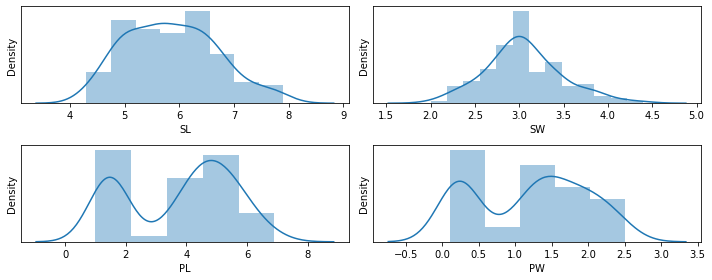

In [6]:
#kde plot of features
f, axes = plt.subplots(2, 2, figsize=(10, 4))
sns.distplot(data['SL'],  ax=axes[0, 0])
sns.distplot(data['SW'],  ax=axes[0, 1])
sns.distplot(data['PL'],  ax=axes[1, 0])
sns.distplot(data['PW'],  ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

**all features are numerical data types and skewed, So filling with median values**

In [7]:
# fill NaN with median 
data['SL'].fillna(data['SL'].median(), inplace=True)
data['SW'].fillna(data['SW'].median(), inplace=True)
data['PL'].fillna(data['PL'].median(), inplace=True)

In [8]:
#checking for null values
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

**No Null Values**

## 2. Do necessary pre-processing steps.

**Handling outliers**

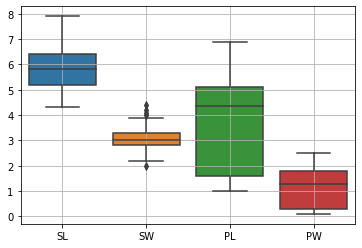

In [9]:
sns.boxplot(data=data)
plt.grid()
plt.show()

**only  few outliers in "SW" column,so not removing them**

**Label encoding on classification feature**

In [10]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [11]:
# feature columns
x=data.drop(['Classification'],axis=1)
#  target column 'Classification''
y=data['Classification']

**Splitting the Data**

In [12]:
# splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.25)

In [13]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (112, 4)
 shape of y train (112,)
 shape of x test (38, 4)
 shape of y test (38,)


## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

**1.Logistic regression**

In [14]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
f1_score is:  0.9444515279017383


In [16]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(logit_model, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9378787878787879


In [17]:
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,1,15


**2.k-NN Model**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors =np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

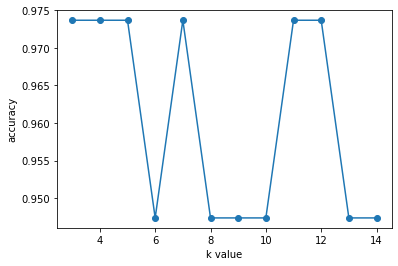

In [19]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

Here highest accuracy is for 3,4,5,7,11,12

In [20]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [21]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
f1_score is:  0.9747545582047685


In [22]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(classifier, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9287878787878787


In [23]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,0,11,0
0,0,1,15


**3.Decision Tree Classifier**

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [25]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
f1_score is:  0.9393939393939394


In [26]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(dt_model, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9553030303030303


In [27]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,10,1,0
1,1,10,0
0,0,0,16


**4.SVM**

**i.Linear**

In [28]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [29]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
f1_score is:  0.9696342305037957


In [30]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(svm_linear, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9287878787878789


In [31]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


**ii.polynomial svm**

In [32]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [33]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
f1_score is:  0.9696342305037957


In [34]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(svm_poly, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9553030303030303


In [35]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


**iii.Radial SVM**

In [36]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [37]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
f1_score is:  0.9444515279017383


In [38]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(svm_radial, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.956060606060606


In [39]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,1,15


**5.Gradient Boosting**

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)

In [41]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9473684210526315
f1_score is:  0.9393939393939394


In [42]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(gb, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9553030303030303


In [43]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,10,1,0
1,1,10,0
0,0,0,16


***6.Extreme gradient boosting***

In [56]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

[12:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
f1_score is:  0.9696342305037957


In [57]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(xgb, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

[12:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [47]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


## 7.Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [68]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("f1_score is: ",f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.9736842105263158
f1_score is:  0.9696342305037957


In [74]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
scores = cross_val_score(rf, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.9643939393939395


**Predicted Values**

In [70]:
compare_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0
5,2,2
6,0,0
7,2,2
8,2,2
9,0,0


**The predictions line up almost perfectly, index 20 is the only time it incorrectly labeled the test data**

**Confusion Matrix**

In [71]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[2, 1, 0]),
             index=[2, 1, 0], columns=[2, 1, 0])

,2,1,0
2,11,0,0
1,1,10,0
0,0,0,16


**In the confusion matrix above the predicted values are the columns and the actual are the rows. It allows us to see where the model makes true and false predictions, and if it predicts incorrectly, we can see which class it is predicting falsely.**

**We can see that class 0 and 2 were all predicted correctly all  times, but the model incorrectly labeled class 1 as class 2 in one instance**

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



<div class="alert alert-block alert-info"><b>FInd:</b><br>  <strong>
    
- Classification model gives the best result to predict iris species is <ins>Random forest Model<ins>   <br> 
    
        
 <ins>Reasons<ins>   <br> 
     
     
     
     
     
 Accuracy is:  0.974  <br> 
f1 score is:  0.969  <br>  
Average Cross Validation score :0.964 <br>  <br>  
    
Without any adjustments or tuning, this model is already performing very well with a test score of .974 and a cross validation score of .964. This means that the model is predicting the correct class for the flower about 97% of time.<br> <br>  

When we predict the data with this model ,predictions line up almost perfectly<br> 
In confusion matrix also 0 and 2 were all predicted correctly all times, but the model incorrectly labeled class 1 as class 2 in one instance
 <strong>   
</div>

Submitted by-

`Kevin M
 DSA Norka B3 2021`

---